In [1]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

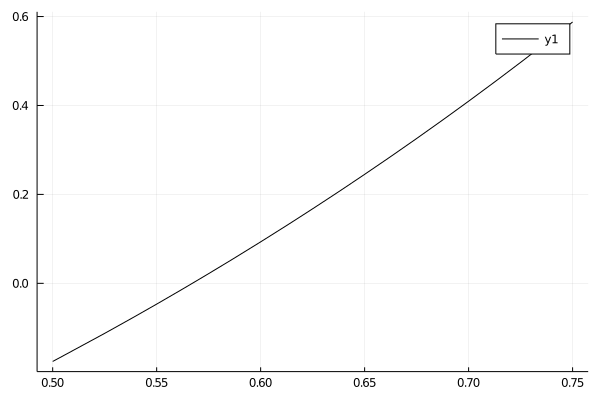

In [7]:
f(x) = exp(x) * x - 1
plot(f, 0.5, 0.75, c=:black)

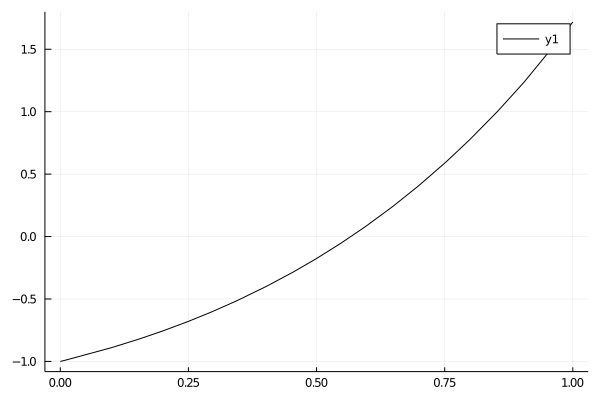

In [9]:
f(x) = exp(x) * x - 1
plot(f, 0.0, 1.0, c=:black)

Teorema base para o método
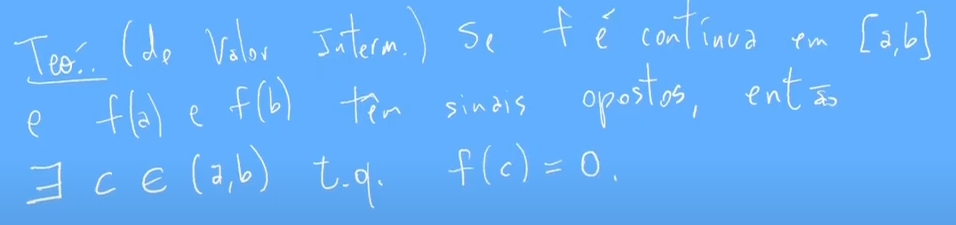

## Método da bissecção
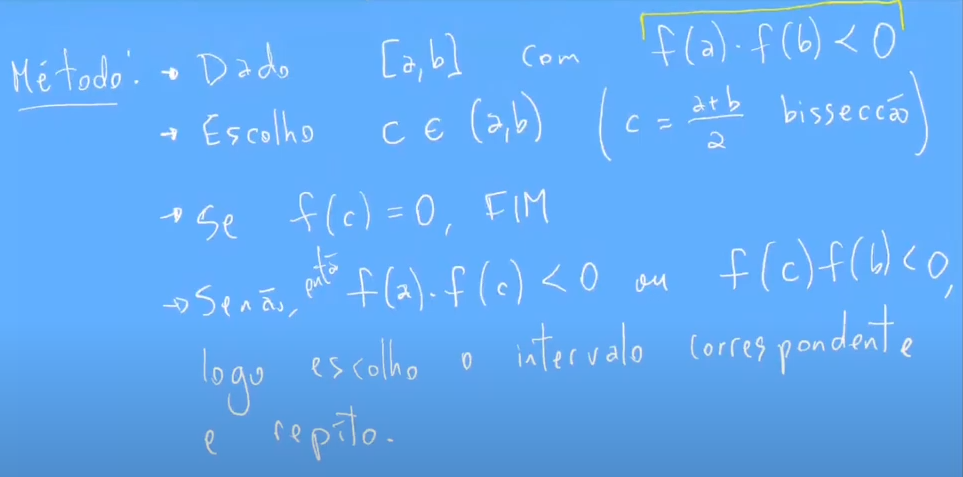

In [8]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [80]:
x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.567143290409784, 2.220446049250313e-16)

O método acima não tem critério de parada, é necessário definir um, dando uma tolerância para a aproximação

In [119]:
function bisseccao(f, a, b; atol = 1e-8, rtol = 1e-8, max_tempo = 10.0, max_iter = 1000)
    fa = f(a)
    fb = f(b)
    ϵ = atol + rtol * max(abs(fa), abs(fb))
    ϵba = atol + rtol * abs(b - a)
    
    #Validações iniciais
    if abs(fa) ≤ ϵ
        return a, fa, :sucesso
    elseif abs(fb) ≤ ϵ
        return b, fb, :sucesso
    elseif fa * fb ≥ 0
        return a, fa, :falha_sinais_opostos
    end
    
    x = (a + b) / 2
    fx = f(x)
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
    cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        x = (a + b) / 2
        fx = f(x)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
        cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    exitflag = :desconhecido
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

bisseccao (generic function with 1 method)

In [120]:
f(x) = exp(x) * x - 1
a, b = 0.0, 1.0
bisseccao(f, a, b)

(0.5671432912349701, 2.2801733834398874e-9, :sucesso)

In [122]:
f(x) = (exp(x) * x - 1) * 1e8
a, b = 0.0, 1.0
bisseccao(f, a, b)

(0.5671432912349701, 0.22801733834398874, :sucesso)

In [124]:
f(x) = x^2 - 2
a, b = 1.0, 2.0
bisseccao(f, a, b, atol=1e-100, rtol=0.0)

(1.414213562373095, -4.440892098500626e-16, :max_iter)

In [126]:
setprecision(512)
f(x) = x^2 - 2
a, b = big"1.0", big"2.0"
bisseccao(f, a, b, atol=1e-100, rtol=0.0)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157270652639468506542033758106760787262467057165468733028807, -8.05746806671660898226333488788170328822662981957751925118139190326809864796976360221214459765968160100814326481116346523751935500304405689665295199347538888e-101, :sucesso)

In [127]:
sqrt(big"2")

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586

In [110]:
1 - 2.220446049250313e-17 == 1

true

In [128]:
eps(big"0.0")

2.38256490488795107321616978173267452041519612555923978795502375260094538610432437489305775137932142344261757534893513700376849772992139878050298035792983489e-323228497

In [134]:
n = 48
V = 40000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end
bisseccao(eq_price, 0.0, 1.0)

(0.015990912914276123, 0.0002747942044152296, :sucesso)